# **Module 5:** Anomaly and Intrusion Detection with Machine Learning

## Why do we need anomaly detection in Cyber Security?

Detecting and mitigating zero-day vulnerabilities is crucial for maintaining robust cybersecurity. A zero-day vulnerability represents a hidden weakness in a computer system, exploitable by attackers and undetected by affected parties. To comprehend the potential impact, consider the scenario where an organization falls victim to a zero-day exploit.

<center>
    <img style="max-width: 670px" src="https://raw.githubusercontent.com/WSU-AI-CyberSecurity/WSU-AI-CyberSecurity.github.io/main/assets/m5_anomaly.png" />
</center>

Identifying abnormal network behavior is instrumental in fortifying organizations against zero-day attacks. This document provides insights into various approaches to achieve effective anomaly detection.

## Technical Explanation
Anomaly detection, also known as outlier detection, involves recognizing unexpected events, observations, or items that significantly deviate from the norm. Anomalous data can often be easily identified by breaking established rules, such as exceeding predefined thresholds.

**Properties of Anomaly**

- Anomalies in data occur infrequently.
- Features of data anomalies are markedly different from those of normal instances.

<center>
    <img style="max-width: 800px" src="https://raw.githubusercontent.com/WSU-AI-CyberSecurity/WSU-AI-CyberSecurity.github.io/main/assets/m5_1.png" />
</center>
 
**Examples of Anomalies:**

- Network anomalies (e.g., intrusion detection forecasting)
- Application performance anomalies
- Web application security anomalies (e.g., XSS attacks, DDoS attacks, unexpected login attempts)


*Refer below time series graph which shows unexpected drop in network usage (anomalous behaviour):*
<center>
    <img style="max-width: 800px" src="https://raw.githubusercontent.com/WSU-AI-CyberSecurity/WSU-AI-CyberSecurity.github.io/main/assets/m5_2.png" />
</center>


**Challenges in Anomaly Detection:**

- Defining normal behavior
- Handling imbalanced distribution of normal and abnormal data
- Sparse occurrence of abnormal events
- Appropriate feature extraction
- Handling noise (distinct from anomalies)
- Future anomalies may differ significantly from training set examples.

**Testing for Anomalous Points:**

- Supervised training requires labeled anomalous data points.
- Unsupervised learning relies on distances or cluster densities to estimate normalcy and outliers.
- Feature Selection Criteria:
- Choose features that exhibit unusually high or low values during anomaly events.


### Real-Time Anomaly Detection
In communication networks, real-time processing is vital for detecting correlated traffic indicative of anomalous behavior, such as DDoS or zero-day attacks.
<center>
    <img style="max-width: 800px" src="https://raw.githubusercontent.com/WSU-AI-CyberSecurity/WSU-AI-CyberSecurity.github.io/main/assets/m5_3.png" />
</center>

**Performance Evaluation Criteria:**
Given class imbalance, accuracy may not be a reliable metric. Confusion matrix analysis is recommended for a more nuanced evaluation.

**Applications:**
Anomaly-based network intrusion detection system, credit card fraud detection, and malware detection are among the diverse applications. Practical examples and demonstrations, including a zero-day attack demo, are available in the provided resources.

*In below picture, red points indicates anomaly based on previously seen data points.*
<center>
    <img style="max-width: 800px" src="https://raw.githubusercontent.com/WSU-AI-CyberSecurity/WSU-AI-CyberSecurity.github.io/main/assets/m5_4.png" />
</center>

**Noise Filtering:**
Prior to applying anomaly detection techniques, noise filtering is essential to reduce false positives. A recommended approach is discussed in the referenced paper.







## Case Study: Detecting Intrusion with Machine Learning

Training data: "Intrusion Detection Evaluation Dataset" (CICIDS2017). Description page: https://www.unb.ca/cic/datasets/ids-2017.html

The data set is public. Download link: http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/

CICIDS2017 combines 8 files recorded on different days of observation (PCAP + CSV). Used archive: http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/GeneratedLabelledFlows.zip

In the downloaded archive GeneratedLabelledFlows.zip the file "Thursday" Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv is selected.

Sources:

* [Sharafaldin2018] Iman Sharafaldin, Arash Habibi Lashkari and Ali A. Ghorbani. Toward Generating a New Intrusion Detection Dataset and Intrusion Traffic Characterization. 2018
* [Kostas2018] Kahraman Kostas. Anomaly Detection in Networks Using Machine Learning. 2018 (error was found in assessing the importance of features)
* https://github.com/bozbil/Anomaly-Detection-in-Networks-Using-Machine-Learning (error was found in assessing the importance of features)

## Data preprocessing

In [54]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

Download the dataset from Github to Google Colab and unzip it.

In [55]:
!pip install graphviz

We use "engine=python" to avoid the "UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 11: invalid start byte" encoding error.

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/WSU-AI-CyberSecurity/data/master/CICIDS2017-thursday.pcap_ISCX.csv', encoding='cp1252', low_memory=False)
df

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.3-192.168.10.50-389-33898-6,192.168.10.50,33898,192.168.10.3,389,6,6/7/2017 8:59,113095465,48,24,...,32,203985.500,5.758373e+05,1629110.0,379.0,13800000.0,4.277541e+06,16500000.0,6737603.0,BENIGN
1,192.168.10.3-192.168.10.50-389-33904-6,192.168.10.50,33904,192.168.10.3,389,6,6/7/2017 8:59,113473706,68,40,...,32,178326.875,5.034269e+05,1424245.0,325.0,13800000.0,4.229413e+06,16500000.0,6945512.0,BENIGN
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,6/7/2017 8:59,119945515,150,0,...,0,6909777.333,1.170000e+07,20400000.0,6.0,24400000.0,2.430000e+07,60100000.0,5702188.0,BENIGN
3,192.168.10.14-65.55.44.109-59135-443-6,192.168.10.14,59135,65.55.44.109,443,6,6/7/2017 8:59,60261928,9,7,...,20,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.14-53-59555-17,192.168.10.14,59555,192.168.10.3,53,17,6/7/2017 8:59,269,2,2,...,32,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170361,157.240.18.35-192.168.10.51-443-55641-6,157.240.18.35,443,192.168.10.51,55641,6,6/7/2017 12:59,49,1,3,...,20,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
170362,192.168.10.51-199.16.156.120-45337-443-6,199.16.156.120,443,192.168.10.51,45337,6,6/7/2017 12:59,217,2,1,...,32,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
170363,192.168.10.12-192.168.10.50-60148-22-6,192.168.10.12,60148,192.168.10.50,22,6,6/7/2017 12:59,1387547,41,46,...,32,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
170364,192.168.10.12-192.168.10.50-60146-22-6,192.168.10.12,60146,192.168.10.50,22,6,6/7/2017 12:59,207,1,1,...,32,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


In [57]:
df.shape

(170366, 85)

The columns "Fwd Header Length" and "Fwd Header Length.1" are identical, the second one is removed, 84 columns remain.

In [58]:
df.columns = df.columns.str.strip()
df = df.drop(columns=['Fwd Header Length.1'])
df.shape

(170366, 84)

When assessing the distribution of labels, it turns out that out of 458968 records there are many blank records ("BENIGN" - benign background traffic).

In [59]:
df['Label'].unique()

array(['BENIGN', 'Web Attack – Brute Force', 'Web Attack – XSS',
       'Web Attack – Sql Injection'], dtype=object)

In [60]:
df['Label'].value_counts()

Label
BENIGN                        168186
Web Attack – Brute Force        1507
Web Attack – XSS                 652
Web Attack – Sql Injection        21
Name: count, dtype: int64

Delete blank records.

In [61]:
df = df.drop(df[pd.isnull(df['Flow ID'])].index)
df.shape

(170366, 84)

The "Flow Bytes/s" and "Flow Packets/s" columns have non-numerical values, replace them.

In [62]:
df.replace('Infinity', -1, inplace=True)
df[["Flow Bytes/s", "Flow Packets/s"]] = df[["Flow Bytes/s", "Flow Packets/s"]].apply(pd.to_numeric)

Replace the NaN values and infinity values with -1.

In [63]:
df.replace([np.inf, -np.inf, np.nan], -1, inplace=True)

Convert string characters to numbers, use LabelEncoder, not OneHotEncoder.

In [64]:
string_features = list(df.select_dtypes(include=['object']).columns)
string_features.remove('Label')
string_features

['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']

In [65]:
le = preprocessing.LabelEncoder()
df[string_features] = df[string_features].apply(lambda col: le.fit_transform(col))

### Undersampling against unbalance

Dataset is unbalanced: total records = 170366, "BENIGN" records = 168186, records with attacks much less: 1507 + 652 + 21 = 2180.

In [66]:
benign_total = len(df[df['Label'] == "BENIGN"])
benign_total

168186

In [67]:
attack_total = len(df[df['Label'] != "BENIGN"])
attack_total

2180

In [68]:
df.to_csv("web_attacks_unbalanced.csv", index=False)
df['Label'].value_counts()

Label
BENIGN                        168186
Web Attack – Brute Force        1507
Web Attack – XSS                 652
Web Attack – Sql Injection        21
Name: count, dtype: int64

We use **undersampling** to correct class imbalances: we remove most of the "BENIGN" records.

Form a balanced dataset web_attacks_balanced.csv in proportion: 30% attack (2180 records), 70% benign data (2180 / 30 * 70 ~ = 5087 records).

Algorithm to form a balanced df_balanced dataset:

* All the records with the attacks are copied to the new dataset.
* There are two conditions for copying "BENIGN" records to the new dataset:

     1. The next record is copyied with the benign_inc_probability.
     2. The total number of "BENIGN" records must not exceed the limit of 5087 records.

Сalculate the probability of copying a "BENIGN" record. The enlargement multiplier is used to get exactly 70% benign data (5087 records).

In [69]:
enlargement = 1.1
benign_included_max = attack_total / 30 * 70
benign_inc_probability = (benign_included_max / benign_total) * enlargement
print(benign_included_max, benign_inc_probability)

5086.666666666667 0.03326872232726466


Copy records from df to df_balanced, save dataset **web_attacks_balanced.csv**.

In [70]:
import random
indexes = []
benign_included_count = 0
for index, row in df.iterrows():
    if (row['Label'] != "BENIGN"):
        indexes.append(index)
    else:
        # Copying with benign_inc_probability
        if random.random() > benign_inc_probability: continue
        # Have we achieved 70% (5087 records)?
        if benign_included_count > benign_included_max: continue
        benign_included_count += 1
        indexes.append(index)
df_balanced = df.loc[indexes]

In [71]:
df_balanced['Label'].value_counts()

Label
BENIGN                        5087
Web Attack – Brute Force      1507
Web Attack – XSS               652
Web Attack – Sql Injection      21
Name: count, dtype: int64

In [72]:
df_balanced.to_csv("web_attacks_balanced.csv", index=False)

### Preparing data for training

In [73]:
df = pd.read_csv('web_attacks_balanced.csv')

The Label column is encoded as follows: "BENIGN" = 0, attack = 1.

In [74]:
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

7 features (Flow ID, Source IP, Source Port, Destination IP, Destination Port, Protocol, Timestamp) are excluded from the dataset. The hypothesis is that the "shape" of the data being transmitted is more important than these attributes. In addition, ports and addresses can be substituted by an attacker, so it is better that the ML algorithm does not take these features into account in training [Kostas2018].

In [75]:
excluded = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp']
df = df.drop(columns=excluded, errors='ignore')

Below at the stage of importance estimation the "Init_Win_bytes_backward" feature has the maximum value. After viewing the source dataset, it seems that an inaccuracy was made in forming the dataset.

It turns out that it is possible to make a fairly accurate classification by one feature.

Description of features: http://www.netflowmeter.ca/netflowmeter.html

     Init_Win_bytes_backward - The total number of bytes sent in initial window in the backward direction
     Init_Win_bytes_forward - The total number of bytes sent in initial window in the forward direction

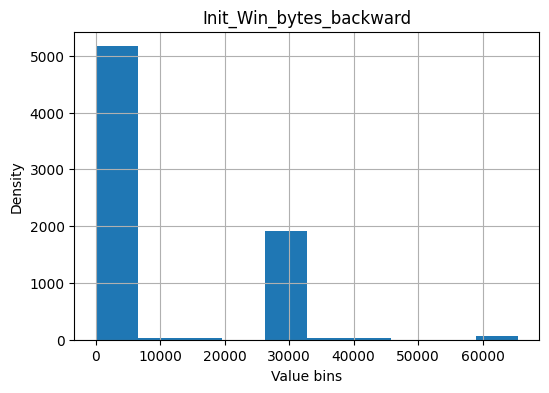

In [76]:
if 'Init_Win_bytes_backward' in df.columns:
    df['Init_Win_bytes_backward'].hist(figsize=(6,4), bins=10);
    plt.title("Init_Win_bytes_backward")
    plt.xlabel("Value bins")
    plt.ylabel("Density")
    plt.savefig('Init_Win_bytes_backward.png', dpi=300)

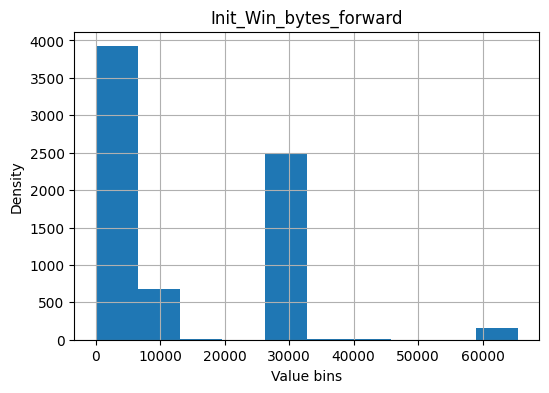

In [77]:
if 'Init_Win_bytes_forward' in df.columns:
    df['Init_Win_bytes_forward'].hist(figsize=(6,4), bins=10);
    plt.title("Init_Win_bytes_forward")
    plt.xlabel("Value bins")
    plt.ylabel("Density")
    plt.savefig('Init_Win_bytes_forward.png', dpi=300)

In [78]:
excluded2 = ['Init_Win_bytes_backward', 'Init_Win_bytes_forward']
df = df.drop(columns=excluded2, errors='ignore')

In [79]:
y = df['Label'].values
X = df.drop(columns=['Label'])
print(X.shape, y.shape)

(7267, 74) (7267,)


## Feature importance

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 3543, 1: 1543}

### Visualization of the decision tree, importance evaluation using a single tree (DecisionTreeClassifier)

In the beginning we use one tree - for the convenience of visualization of the classifier. High cross-validation scores even with 5 leaves look suspiciously good, we should look at the data carefully. Parameters for change - test_size in the cell above (train_test_split), max_leaf_nodes in the cell below.

By changing the **random_state** parameter, we will get different trees and different features with the highest importance. But the forest will already average individual trees below.

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
decision_tree = decision_tree.fit(X_train, y_train)
cross_val_score(decision_tree, X_train, y_train, cv=10)

array([0.95874263, 0.97249509, 0.96267191, 0.96070727, 0.94302554,
       0.94695481, 0.96653543, 0.95275591, 0.95866142, 0.95669291])

In [82]:
from sklearn.tree import export_text
r = export_text(decision_tree, feature_names=X_train.columns.to_list())
print(r)

|--- Packet Length Mean <= 0.75
|   |--- Fwd IAT Std <= 3524936.88
|   |   |--- class: 0
|   |--- Fwd IAT Std >  3524936.88
|   |   |--- Fwd IAT Min <= 11241.00
|   |   |   |--- class: 1
|   |   |--- Fwd IAT Min >  11241.00
|   |   |   |--- class: 0
|--- Packet Length Mean >  0.75
|   |--- Subflow Fwd Bytes <= 37130.00
|   |   |--- class: 0
|   |--- Subflow Fwd Bytes >  37130.00
|   |   |--- class: 1



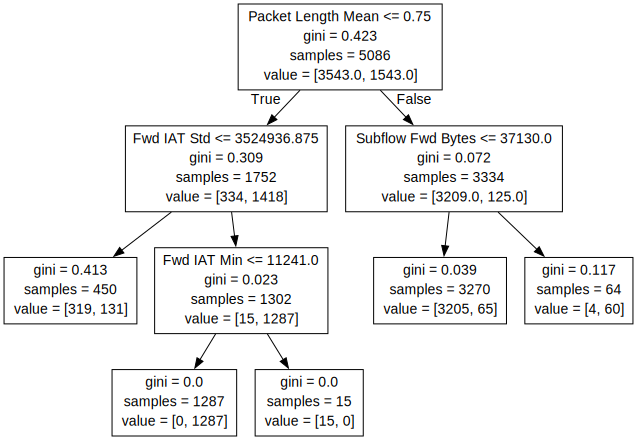

In [83]:
from graphviz import Source
from sklearn import tree
Source(tree.export_graphviz(decision_tree, out_file=None, feature_names=X.columns))

Analyze the confusion matrix. Which classes are confidently classified by the model?

In [84]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 1544, 1: 637}

In [85]:
from sklearn.metrics import confusion_matrix
y_pred = decision_tree.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1544,    0],
       [  92,  545]])

### Importance evaluation using SelectFromModel

In [86]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(estimator=decision_tree).fit(X_train, y_train)
sfm.estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17782863, 0.        , 0.01621238, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.7481656 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05779339, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [87]:
sfm.threshold_

0.013513513513513514

In [88]:
X_train_new = sfm.transform(X_train)
print("Original num features: {}, selected num features: {}"
      .format(X_train.shape[1], X_train_new.shape[1]))

Original num features: 74, selected num features: 4


In [89]:
indices = np.argsort(decision_tree.feature_importances_)[::-1]
for idx, i in enumerate(indices[:10]):
    print("{}.\t{} - {}".format(idx, X_train.columns[i], decision_tree.feature_importances_[i]))

0.	Packet Length Mean - 0.7481656013741973
1.	Fwd IAT Std - 0.17782862880204273
2.	Subflow Fwd Bytes - 0.05779338565191023
3.	Fwd IAT Min - 0.016212384171849784
4.	Idle Min - 0.0
5.	Bwd IAT Std - 0.0
6.	Fwd IAT Mean - 0.0
7.	Fwd IAT Max - 0.0
8.	Bwd IAT Total - 0.0
9.	Bwd IAT Mean - 0.0


### Evaluation of importance using RandomForestClassifier.feature_importances_

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=250, random_state=42, oob_score=True)
rf.fit(X_train, y_train)
# Score = mean accuracy on the given test data and labels
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f} \nOut-of-bag Score: {:.2f}'
      .format(rf.score(X_train, y_train), rf.score(X_test, y_test), rf.oob_score_))

R^2 Training Score: 0.99 
R^2 Validation Score: 0.97 
Out-of-bag Score: 0.97


In [91]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
webattack_features = []

for index, i in enumerate(indices[:20]):
    webattack_features.append(features[i])
    print('{}.\t#{}\t{:.3f}\t{}'.format(index + 1, i, importances[i], features[i]))

1.	#51	0.081	Average Packet Size
2.	#13	0.077	Flow Bytes/s
3.	#39	0.065	Packet Length Mean
4.	#38	0.062	Max Packet Length
5.	#61	0.056	Subflow Fwd Bytes
6.	#23	0.056	Fwd IAT Min
7.	#7	0.053	Fwd Packet Length Mean
8.	#52	0.051	Avg Fwd Segment Size
9.	#3	0.046	Total Length of Fwd Packets
10.	#15	0.033	Flow IAT Mean
11.	#5	0.032	Fwd Packet Length Max
12.	#21	0.031	Fwd IAT Std
13.	#33	0.030	Fwd Header Length
14.	#14	0.023	Flow Packets/s
15.	#0	0.021	Flow Duration
16.	#35	0.021	Fwd Packets/s
17.	#16	0.019	Flow IAT Std
18.	#17	0.018	Flow IAT Max
19.	#20	0.018	Fwd IAT Mean
20.	#22	0.016	Fwd IAT Max


For comparison, the results of the study [Sharafaldin2018] (compare relatively, without taking into account the multiplier):

* Init Win F.Bytes 0.0200
* Subflow F.Bytes 0.0145
* Init Win B.Bytes 0.0129
* Total Len F.Packets 0.0096

And incorrect results [Kostas2018] (error was found in assessing the importance of features, line: *impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})*, the importances[0:20] sample does not take into account that the values are not sorted in descending order):

* Flow Bytes/s 0.313402
* Total Length of Fwd Packets 0.304917
* Flow Duration 0.000485
* Fwd Packet Length Max 0.00013

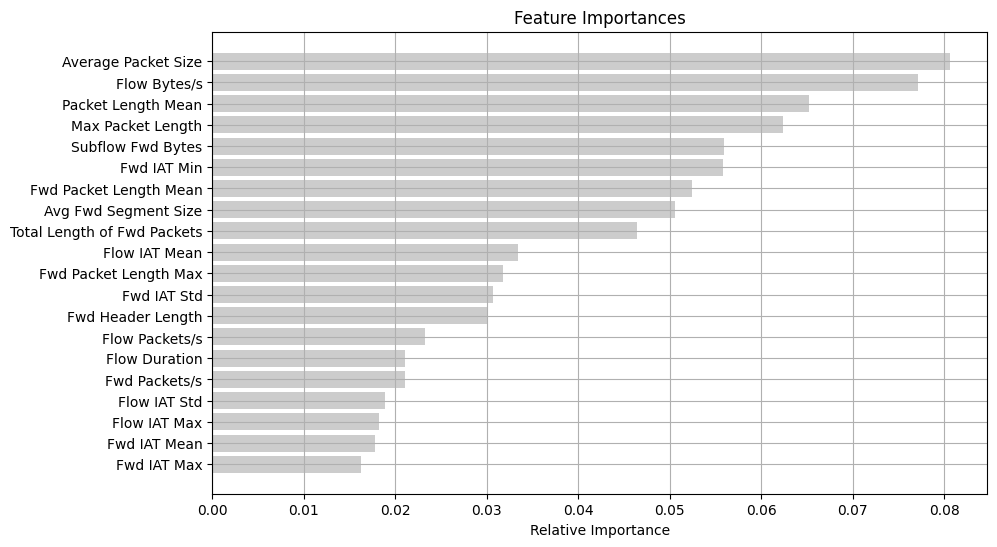

In [92]:
indices = np.argsort(importances)[-20:]
plt.rcParams['figure.figsize'] = (10, 6)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#cccccc', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()

In [93]:
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1520,   24],
       [  32,  605]])

Next, for experiments, we keep the first max_features of features with maximum importance.

In [94]:
max_features = 20
webattack_features = webattack_features[:max_features]
webattack_features

['Average Packet Size',
 'Flow Bytes/s',
 'Packet Length Mean',
 'Max Packet Length',
 'Subflow Fwd Bytes',
 'Fwd IAT Min',
 'Fwd Packet Length Mean',
 'Avg Fwd Segment Size',
 'Total Length of Fwd Packets',
 'Flow IAT Mean',
 'Fwd Packet Length Max',
 'Fwd IAT Std',
 'Fwd Header Length',
 'Flow Packets/s',
 'Flow Duration',
 'Fwd Packets/s',
 'Flow IAT Std',
 'Flow IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Max']

## Analysis of selected features

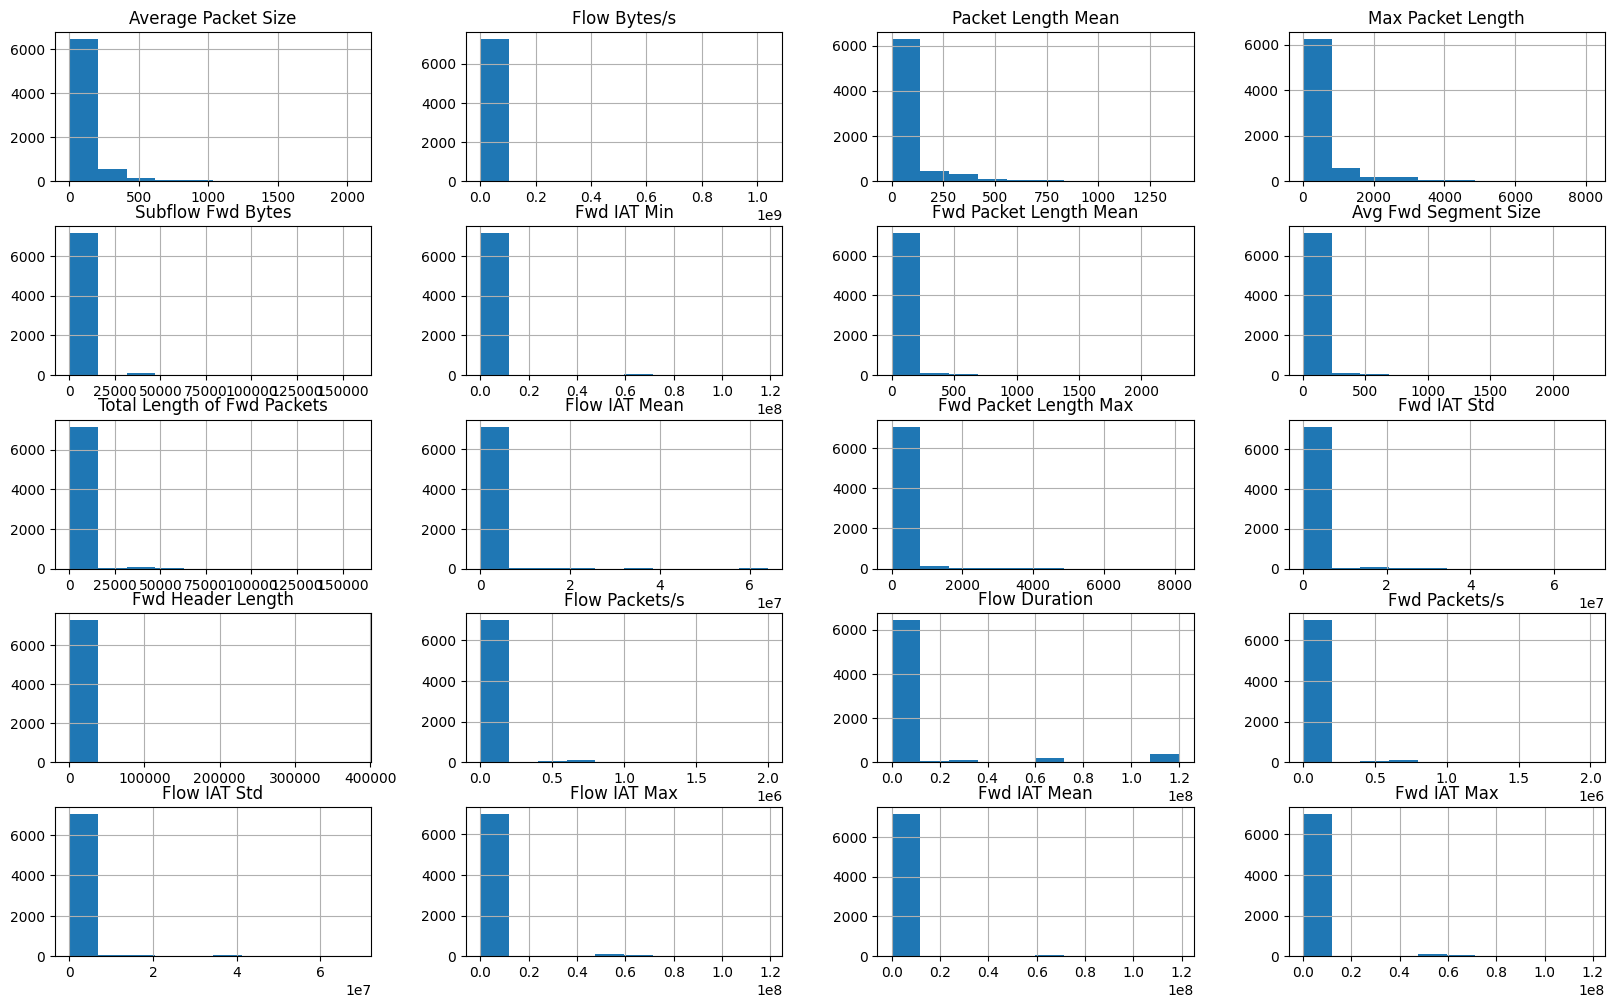

In [95]:
df[webattack_features].hist(figsize=(20,12), bins=10);
plt.savefig('features_hist.png', dpi=300)

Install Facets Overview

https://pair-code.github.io/facets/

In [96]:
!pip install facets-overview

Create the feature stats for the datasets and stringify it.

In [97]:
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'train + test', 'table': df[webattack_features]}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

/home/soraxas/micromamba/envs/wsu/lib/python3.9/site-packages/facets_overview/base_generic_feature_statistics_generator.py:121: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  flattened = x.ravel()


Display the facets overview visualization for this data.

In [143]:
from IPython.display import display, HTML

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

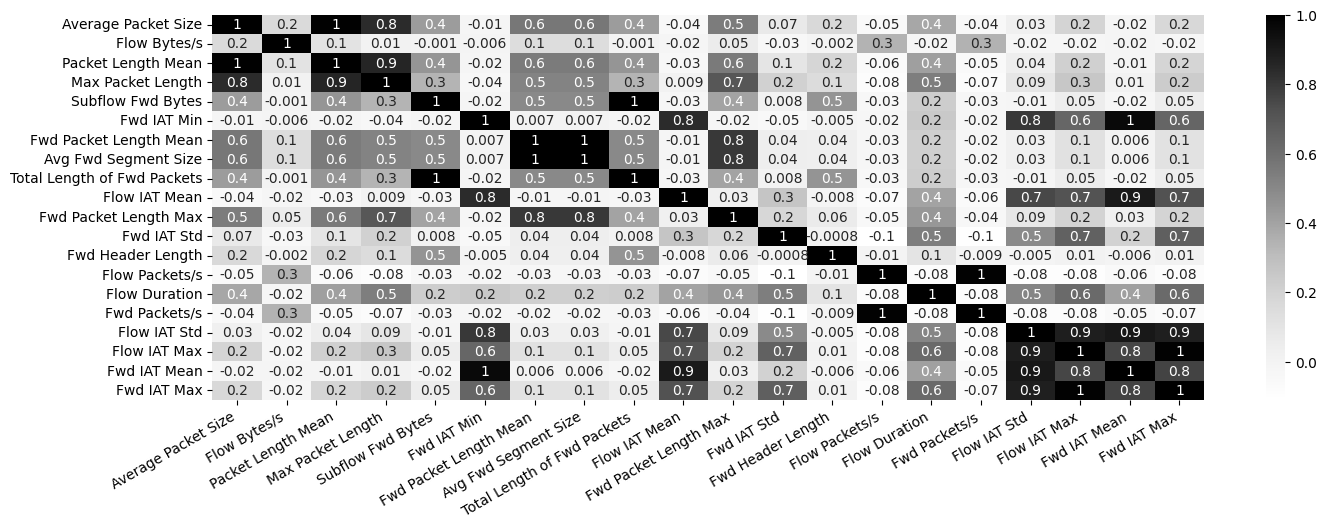

In [99]:
import seaborn as sns
corr_matrix = df[webattack_features].corr()
plt.rcParams['figure.figsize'] = (16, 5)
g = sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='Greys')
g.set_xticklabels(g.get_xticklabels(), verticalalignment='top', horizontalalignment='right', rotation=30);
plt.savefig('corr_heatmap.png', dpi=300, bbox_inches='tight')

Remove correlated features.

In [100]:
to_be_removed = {'Packet Length Mean', 'Avg Fwd Segment Size', 'Subflow Fwd Bytes',
                 'Fwd Packets/s', 'Fwd IAT Total', 'Fwd IAT Max'}
webattack_features = [item for item in webattack_features if item not in to_be_removed]
webattack_features = webattack_features[:10]
webattack_features

['Average Packet Size',
 'Flow Bytes/s',
 'Max Packet Length',
 'Fwd IAT Min',
 'Fwd Packet Length Mean',
 'Total Length of Fwd Packets',
 'Flow IAT Mean',
 'Fwd Packet Length Max',
 'Fwd IAT Std',
 'Fwd Header Length']

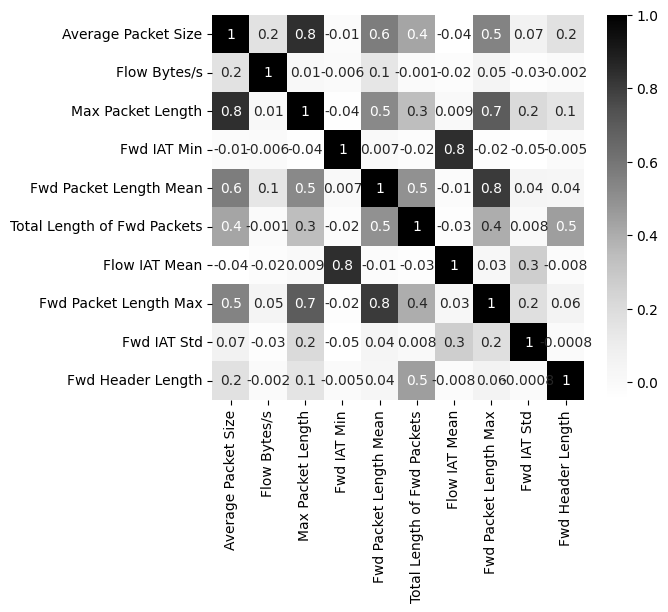

In [101]:
corr_matrix = df[webattack_features].corr()
plt.rcParams['figure.figsize'] = (6, 5)
sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='Greys');

## Hyperparameter selection

Reopen the dataset.

In [102]:
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('web_attacks_balanced.csv')
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
y = df['Label'].values
X = df[webattack_features]
print(X.shape, y.shape)

(7267, 10) (7267,)


If necessary, we will work with our own dataset.

In [103]:
#df = pd.read_csv('mix_labelled.csv')
#y = df['Label'].values
#X = df[webattack_features]
#print(X.shape, y.shape)

We get the list of RandomForestClassifier parameters.

In [110]:
rfc = RandomForestClassifier(random_state=1)
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

For search of quasi-optimal value of one parameter we fix the others.

In [114]:
parameters = {'n_estimators': [10],
              'min_samples_leaf': [3],
              'max_features': [3],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 20, 30, 50]}
scoring = ('f1', 'accuracy')
gcv = GridSearchCV(rfc, parameters, scoring=scoring, refit='f1', cv=10, return_train_score=True)
gcv.fit(X, y)
results = gcv.cv_results_

In [115]:
cv_results = pd.DataFrame(gcv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_f1,...,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,split5_train_accuracy,split6_train_accuracy,split7_train_accuracy,split8_train_accuracy,split9_train_accuracy,mean_train_accuracy,std_train_accuracy
0,0.012530,0.001730,0.001747,0.000314,1,3,3,10,"{'max_depth': 1, 'max_features': 3, 'min_sampl...",0.891509,...,0.914985,0.909480,0.912691,0.912844,0.909633,0.910105,0.906895,0.912552,0.910830,0.002354
1,0.016174,0.000129,0.001513,0.000062,2,3,3,10,"{'max_depth': 2, 'max_features': 3, 'min_sampl...",0.893939,...,0.957034,0.957187,0.957034,0.957187,0.958104,0.953830,0.953371,0.959486,0.956913,0.001833
2,0.019908,0.000145,0.001543,0.000079,3,3,3,10,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.893939,...,0.960092,0.959633,0.959786,0.959480,0.959786,0.955664,0.955511,0.960098,0.959023,0.001742
3,0.022983,0.000326,0.001557,0.000040,4,3,3,10,"{'max_depth': 4, 'max_features': 3, 'min_sampl...",0.910000,...,0.971713,0.971713,0.971407,0.962691,0.967890,0.968965,0.966366,0.967436,0.968870,0.002796
4,0.024346,0.000631,0.001577,0.000077,5,3,3,10,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.923457,...,0.976911,0.972324,0.969878,0.972018,0.972630,0.969577,0.969729,0.973399,0.972157,0.002108


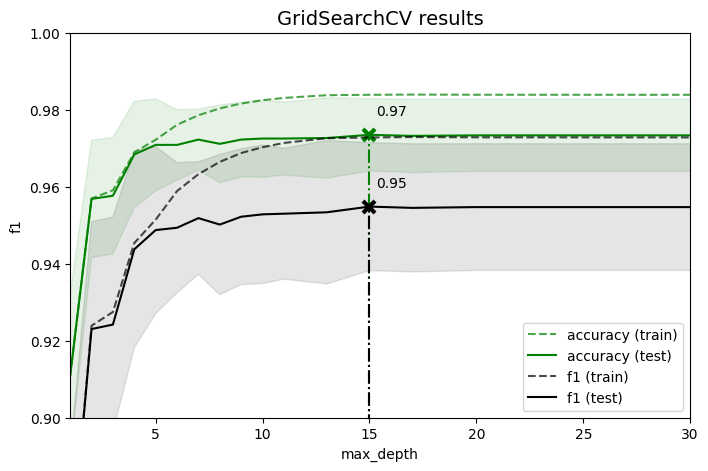

In [125]:
# https://scikit-learn.org/dev/auto_examples/model_selection/plot_multi_metric_evaluation.html
plt.figure(figsize=(8, 5))
plt.title("GridSearchCV results", fontsize=14)

plt.xlabel("max_depth")
plt.ylabel("f1")

ax = plt.gca()
ax.set_xlim(1, 30)
ax.set_ylim(0.9, 1)

X_axis = np.array(results['param_max_depth'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index] + 0.3, best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.savefig('GridSearchCV_results.png', dpi=300)
plt.show()

## Final model

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5086, 10) (5086,)
(2181, 10) (2181,)


In [127]:
rfc = RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3, n_estimators=50, random_state=42, oob_score=True)
# rfc = RandomForestClassifier(n_estimators=250, random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3,
                       n_estimators=50, oob_score=True, random_state=42)

In [128]:
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

for index, i in enumerate(indices[:10]):
    print('{}.\t#{}\t{:.3f}\t{}'.format(index + 1, i, importances[i], features[i]))

1.	#2	0.402	Max Packet Length
2.	#0	0.245	Average Packet Size
3.	#8	0.129	Fwd IAT Std
4.	#9	0.054	Fwd Header Length
5.	#5	0.049	Total Length of Fwd Packets
6.	#3	0.043	Fwd IAT Min
7.	#6	0.043	Flow IAT Mean
8.	#4	0.016	Fwd Packet Length Mean
9.	#1	0.015	Flow Bytes/s
10.	#7	0.006	Fwd Packet Length Max


In [129]:
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1526,   18],
       [  40,  597]])

In [130]:
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Accuracy = 0.973406694176983
Precision = 0.9707317073170731
Recall = 0.9372056514913658
F1 = 0.9536741214057508


## Model approbation

In [134]:
df = pd.read_csv('web_attacks_balanced.csv')
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
y_test = df['Label'].values
X_test = df[webattack_features]
print(X_test.shape, y_test.shape)

(7267, 10) (7267,)


In [135]:
X_test.head()

,Average Packet Size,Flow Bytes/s,Max Packet Length,Fwd IAT Min,Fwd Packet Length Mean,Total Length of Fwd Packets,Flow IAT Mean,Fwd Packet Length Max,Fwd IAT Std,Fwd Header Length
0,66.250000,1.009258e+04,98,4.0,23.0,46,7.992667e+03,23,0.0,64
1,49.714286,1.255896e+01,48,3.0,48.0,672,3.963526e+06,48,20100000.0,304
2,75.000000,1.065574e+06,90,3.0,40.0,80,8.133333e+01,40,0.0,28
3,80.000000,1.326923e+06,94,49.0,44.0,88,6.933333e+01,44,0.0,64
4,88.500000,5.745894e+03,91,0.0,43.0,43,2.332100e+04,43,0.0,32


In [136]:
import time
seconds = time.time()
y_pred = rfc.predict(X_test)
print("Total operation time:", time.time() - seconds, "seconds")

print("Benign records detected (0), attacks detected (1):")
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

Total operation time: 0.013282537460327148 seconds
Benign records detected (0), attacks detected (1):


{0: 5139, 1: 2128}

Confusion matrix:

      0  1 - predicted value (Wikipedia uses different convention for axes)
    0 TN FP
    1 FN TP

In [138]:
confusion_matrix(y_test, y_pred)

array([[5044,   43],
       [  95, 2085]])

In [139]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Accuracy = 0.981010045410761
Precision = 0.9797932330827067
Recall = 0.9564220183486238
F1 = 0.967966573816156


In [140]:
predict = pd.DataFrame({'Predict': rfc.predict(X_test)})
label = pd.DataFrame({'Label': y_test})
result = X_test.join(label).join(predict)

In [141]:
display("The following is point that are predicted to be intrusion (anomaly)")
result[result['Predict'] == 1]

'The following is point that are predicted to be intrusion (anomaly)'

,Average Packet Size,Flow Bytes/s,Max Packet Length,Fwd IAT Min,Fwd Packet Length Mean,Total Length of Fwd Packets,Flow IAT Mean,Fwd Packet Length Max,Fwd IAT Std,Fwd Header Length,Label,Predict
122,0.000000,0.000000,0,0.0,0.000000,0,4.400000e+01,0,0.000000e+00,32,0,1
444,0.000000,0.000000,0,0.0,0.000000,0,8.100000e+01,0,0.000000e+00,32,1,1
448,218.454545,478.624430,1066,18.0,139.000000,973,5.020638e+05,565,2.021330e+06,232,1,1
512,618.150000,7589.090322,5330,195.0,178.750000,2145,8.573942e+04,566,4.370286e+05,392,1,1
514,549.319149,1206.155288,2896,705.0,211.678571,5927,4.653305e+05,561,1.474704e+06,904,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6790,0.000000,0.000000,0,0.0,0.000000,0,4.100000e+01,0,0.000000e+00,32,0,1
6814,105.666667,62.519533,507,16146.0,101.400000,507,1.901406e+06,507,4.964304e+06,168,0,1
6826,0.000000,0.000000,0,0.0,0.000000,0,5.000000e+01,0,0.000000e+00,32,0,1
6827,0.000000,0.000000,0,0.0,0.000000,0,8.100000e+01,0,0.000000e+00,32,0,1


In [142]:
display("The following is point that are predicted to be genuine")
result[result['Predict'] == 0]

'The following is point that are predicted to be genuine'

,Average Packet Size,Flow Bytes/s,Max Packet Length,Fwd IAT Min,Fwd Packet Length Mean,Total Length of Fwd Packets,Flow IAT Mean,Fwd Packet Length Max,Fwd IAT Std,Fwd Header Length,Label,Predict
0,66.250000,1.009258e+04,98,4.0,23.0,46,7.992667e+03,23,0.0,64,0,0
1,49.714286,1.255896e+01,48,3.0,48.0,672,3.963526e+06,48,20100000.0,304,0,0
2,75.000000,1.065574e+06,90,3.0,40.0,80,8.133333e+01,40,0.0,28,0,0
3,80.000000,1.326923e+06,94,49.0,44.0,88,6.933333e+01,44,0.0,64,0,0
4,88.500000,5.745894e+03,91,0.0,43.0,43,2.332100e+04,43,0.0,32,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9.000000,1.237113e+05,6,97.0,6.0,12,9.700000e+01,6,0.0,40,0,0
7263,28.750000,6.013072e+05,23,0.0,23.0,46,5.100000e+01,23,0.0,64,0,0
7264,28.750000,4.693878e+05,23,49.0,23.0,46,6.533333e+01,23,0.0,64,0,0
7265,9.000000,1.304348e+05,6,92.0,6.0,12,9.200000e+01,6,0.0,40,0,0
